In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_json("fashion_products_dataset.json")

In [3]:
df.head()

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


In [4]:
df_exploded = pd.concat([df.drop(columns=['product_details']), df['product_details'].apply(lambda x: pd.Series({k: v for d in x for k, v in d.items()}))], axis=1)

# Display the DataFrame with flattened product_details
print(df_exploded)

                                        _id actual_price average_rating brand  \
0      fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a        2,999            3.9  York   
1      893e6980-f2a0-531f-b056-34dd63fe912c        1,499            3.9  York   
2      eb4c8eab-8206-59d0-bcd1-a724d96bf74f        2,999            3.9  York   
3      3f3f97bb-5faf-57df-a9ff-1af24e2b1045        2,999            3.9  York   
4      750caa3d-6264-53ca-8ce1-94118a1d8951        2,999            3.9  York   
...                                     ...          ...            ...   ...   
29995  3705c6bd-6f23-529a-9b64-15b8fc568efa        2,299                  Oka   
29996  f2a683e4-634d-5a11-8950-2d56b924576d          799            3.8   Oka   
29997  1efa858c-1360-59a6-9624-bb04eddb492c        4,999                  Oka   
29998  9fdfdd22-487b-599b-8be6-5dd00eb987c5        3,125            3.8   Oka   
29999  a5396fab-753c-5cd7-bad9-050964f95a0f        3,125                  Oka   

                       cate

In [5]:
df_exploded.columns

Index(['_id', 'actual_price', 'average_rating', 'brand', 'category',
       'crawled_at', 'description', 'discount', 'images', 'out_of_stock',
       ...
       'Sleeve in inch', 'Brand', 'Model Number', 'Shade', 'Thumb Hole',
       'Length', 'Strap Material', 'Weave type', 'Fabric care', 'Coat Type'],
      dtype='object', length=143)

In [6]:
df.columns

Index(['_id', 'actual_price', 'average_rating', 'brand', 'category',
       'crawled_at', 'description', 'discount', 'images', 'out_of_stock',
       'pid', 'product_details', 'seller', 'selling_price', 'sub_category',
       'title', 'url'],
      dtype='object')

In [7]:
df_exploded.isnull().sum()/len(df)*100

_id                0.000000
actual_price       0.000000
average_rating     0.000000
brand              0.000000
category           0.000000
                    ...    
Length            99.983333
Strap Material    99.920000
Weave type        99.993333
Fabric care       99.996667
Coat Type         99.986667
Length: 143, dtype: float64

In [9]:
df_alter = df_exploded[['_id', 'actual_price', 'average_rating', 'brand', 'category',
       'crawled_at', 'description', 'discount', 'images', 'out_of_stock',
       'pid', 'seller', 'selling_price', 'sub_category',
       'title', 'url', 'Style Code', 'Fabric','Pattern']]

In [10]:
df_alter["Pattern"] = df_alter["Pattern"].bfill()

In [11]:
df_alter["Style Code"] = df_alter["Style Code"].bfill()

In [12]:
df_alter["Fabric"] = df_alter["Fabric"].bfill()

In [13]:
df_alter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   _id             30000 non-null  object        
 1   actual_price    30000 non-null  object        
 2   average_rating  30000 non-null  object        
 3   brand           30000 non-null  object        
 4   category        30000 non-null  object        
 5   crawled_at      30000 non-null  datetime64[ns]
 6   description     30000 non-null  object        
 7   discount        30000 non-null  object        
 8   images          30000 non-null  object        
 9   out_of_stock    30000 non-null  bool          
 10  pid             30000 non-null  object        
 11  seller          30000 non-null  object        
 12  selling_price   30000 non-null  object        
 13  sub_category    30000 non-null  object        
 14  title           30000 non-null  object        
 15  ur

In [14]:
df_alter.isnull().sum()/len(df)*100

_id               0.0
actual_price      0.0
average_rating    0.0
brand             0.0
category          0.0
crawled_at        0.0
description       0.0
discount          0.0
images            0.0
out_of_stock      0.0
pid               0.0
seller            0.0
selling_price     0.0
sub_category      0.0
title             0.0
url               0.0
Style Code        0.0
Fabric            0.0
Pattern           0.0
dtype: float64

In [15]:
df_alter.dtypes

_id                       object
actual_price              object
average_rating            object
brand                     object
category                  object
crawled_at        datetime64[ns]
description               object
discount                  object
images                    object
out_of_stock                bool
pid                       object
seller                    object
selling_price             object
sub_category              object
title                     object
url                       object
Style Code                object
Fabric                    object
Pattern                   object
dtype: object

In [16]:
df_alter['actual_price'] = df_alter['actual_price'].str.replace(',', '')

In [17]:
df_alter['actual_price'] = pd.to_numeric(df_alter["actual_price"])

In [18]:
df_alter['average_rating'] = pd.to_numeric(df_alter["average_rating"])

In [19]:
df_alter['crawled_at'] = pd.to_datetime(df_alter['crawled_at'], format='%d-%m-%Y %H:%M')

In [20]:
df_alter['year'] = df_alter['crawled_at'].dt.year
df_alter['month'] = df_alter['crawled_at'].dt.month

df_alter = df_alter.drop('crawled_at', axis=1)

In [21]:
 df_alter['discount'].unique()

array(['69% off', '66% off', '68% off', '74% off', '63% off', '67% off',
       '64% off', '76% off', '49% off', '61% off', '48% off', '70% off',
       '71% off', '29% off', '79% off', '73% off', '80% off', '81% off',
       '72% off', '77% off', '82% off', '84% off', '54% off', '83% off',
       '78% off', '22% off', '47% off', '35% off', '56% off', '75% off',
       '62% off', '60% off', '51% off', '44% off', '33% off', '50% off',
       '25% off', '28% off', '45% off', '53% off', '40% off', '52% off',
       '30% off', '57% off', '42% off', '65% off', '59% off', '55% off',
       '58% off', '46% off', '41% off', '34% off', '43% off', '38% off',
       '39% off', '86% off', '87% off', '12% off', '37% off', '5% off',
       '31% off', '24% off', '27% off', '32% off', '4% off', '',
       '23% off', '20% off', '9% off', '36% off', '21% off', '1% off',
       '10% off', '17% off', '8% off', '6% off', '2% off', '15% off',
       '3% off', '11% off', '16% off', '7% off', '18% off', '14% 

In [22]:
df_alter['discount'] = df_alter['discount'].str.replace('% off', '')

In [23]:
df_alter['discount'] = pd.to_numeric(df_alter["discount"])

In [24]:
df_alter['selling_price'] = df_alter['selling_price'].str.replace(',', '')
df_alter['selling_price'] = pd.to_numeric(df_alter["selling_price"])

In [25]:
df_alter.dtypes

_id                object
actual_price      float64
average_rating    float64
brand              object
category           object
description        object
discount          float64
images             object
out_of_stock         bool
pid                object
seller             object
selling_price     float64
sub_category       object
title              object
url                object
Style Code         object
Fabric             object
Pattern            object
year                int32
month               int32
dtype: object

In [26]:
df_alter.head()

,_id,actual_price,average_rating,brand,category,description,discount,images,out_of_stock,pid,seller,selling_price,sub_category,title,url,Style Code,Fabric,Pattern,year,month
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,2999.0,3.9,York,Clothing and Accessories,Yorker trackpants made from 100% rich combed c...,69.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,Shyam Enterprises,921.0,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...,1005COMBO2,Cotton Blend,Solid,2021,2
1,893e6980-f2a0-531f-b056-34dd63fe912c,1499.0,3.9,York,Clothing and Accessories,Yorker trackpants made from 100% rich combed c...,66.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,Shyam Enterprises,499.0,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...,1005BLUE,Cotton Blend,Solid,2021,2
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,2999.0,3.9,York,Clothing and Accessories,Yorker trackpants made from 100% rich combed c...,68.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,Shyam Enterprises,931.0,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...,1005COMBO4,Cotton Blend,Solid,2021,2
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,2999.0,3.9,York,Clothing and Accessories,Yorker trackpants made from 100% rich combed c...,69.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,Shyam Enterprises,911.0,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...,1005COMBO3,Cotton Blend,Solid,2021,2
4,750caa3d-6264-53ca-8ce1-94118a1d8951,2999.0,3.9,York,Clothing and Accessories,Yorker trackpants made from 100% rich combed c...,68.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,Shyam Enterprises,943.0,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...,1005COMBO1,Cotton Blend,Solid,2021,2


In [29]:
df_alter.shape

(30000, 20)

In [31]:
df_alter.describe()

,actual_price,average_rating,discount,selling_price,year,month
count,29137.000000,27554.000000,29059.000000,29998.000000,30000.0,30000.0
mean,1472.617703,3.641972,50.336109,716.557637,2021.0,2.0
std,963.263221,0.664232,16.823987,572.438776,0.0,0.0
min,150.000000,1.000000,1.000000,99.000000,2021.0,2.0
25%,865.000000,3.300000,40.000000,398.000000,2021.0,2.0
50%,1249.000000,3.800000,53.000000,549.000000,2021.0,2.0
75%,1799.000000,4.100000,63.000000,829.000000,2021.0,2.0
max,12999.000000,5.000000,87.000000,7999.000000,2021.0,2.0


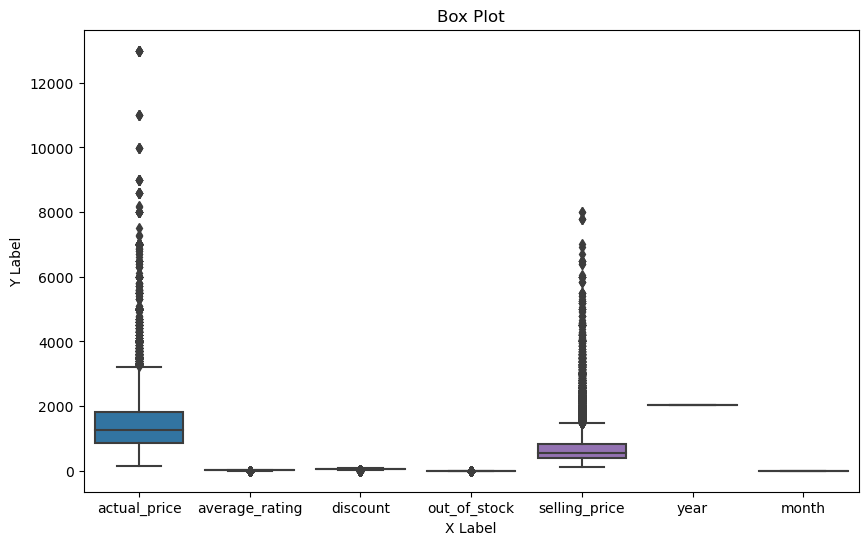

In [34]:
import seaborn as sns

plt.figure(figsize=(10, 6))
# Create the box plot using Seaborn
sns.boxplot(data=df_alter)

# Add title and labels
plt.title('Box Plot')
plt.xlabel('X Label')
plt.ylabel('Y Label')

# Show the plot
plt.show()

In [160]:
df_alter.to_excel("e_commerce.xlsx")